In [70]:
import numpy as np
import pandas as pd
from numpy import linalg as LA
import matplotlib.pyplot as plt

In [76]:
def principalComponents(train):
    
    W, V = LA.eig(np.matmul(np.array(A),np.array(A.T)))
    
    for i in range(len(W)):
        W[i] = abs(W[i])**0.5
    
    K = sorted(W ,reverse = True)
    return W, V, K


def plotPrincipalComponents(train ,sortedPrincipalComponents, n):
    
    X_axis = range(1,len(train)+1)
    
    plt.bar(X_axis[:n],sortedPrincipalComponents[:n])
    plt.xlabel("Sr. no. of singular value")
    plt.ylabel("Principal Singular value")
    plt.title("First 50 Principal Components")
    plt.show()
    
    
def reduced_train_test_data(A,Z,W,V,K,l):        # A is train dataset
                                                 # Z is test dataset
                                                 # W is eigenvalues of A
                                                 # V is eigenvectors
                                                 # K is sorted eigenvalues
                                                 # l is the required dimension of each data point
    
    #Principal Components
    W = list(W)
    s = []
    
    
    for i in range(l):
        s.append(W.index(K[i]))
        
    #Orthogonal Matrix U
    U = pd.DataFrame(V[:,s])
    
    #Diagonal Matrix S(σ)
    S = pd.DataFrame(np.diag(K[0:l]))
    
    #Matrix Multiplication of U and σ to give l dimensional dataset
    reduced_train_data = pd.DataFrame(np.matmul(U,S))
    
    #Mention the classes of each train datapoint
    y = [j for j in [0,1,2,3,4,5,6,7,8,9] for i in range(52)]
    reduced_train_data["class"] = y
    
    #Reducing the dimension using SVD to give l dimensional test dataset
    Vs = pd.DataFrame(np.matmul(np.array(A.T),np.array(U)))
    S_inverse = LA.inv(S)
    
    V = pd.DataFrame(np.matmul(Vs,S_inverse))
    
    reduced_test_data = pd.DataFrame(np.matmul(np.array(Z),np.array(V)))
    
    
    #Mention the classes of each test datapoint 
    y_test = [j for j in [0,1,2,3,4,5,6,7,8,9] for i in range(12)]
    reduced_test_data["class"] = y_test
    
    
    return reduced_train_data,reduced_test_data




def new_accuracy(A,Z,W,V,K,l):
    
    #reducing the dimensions
    reduced_train_data,reduced_test_data = reduced_train_test_data(A,Z,W,V,K,l)
    
    #grouping data for each class
    s = reduced_train_data.groupby(["class"])
    
    #Making projection matrix for each class
    P = []
    
    for i in range(10):
        
        m = s.get_group(i)
        m = m.iloc[:,:-1]
        m = m.T
        Inv = LA.pinv(m)
        P.append(pd.DataFrame(np.matmul(np.array(m),Inv)))
    
    #predictions for test data
    test_pred_class = []
    
    for i in range(len(reduced_test_data)):
        
        u = np.array(reduced_test_data.iloc[i,:-1])
        dist = []
        
        #Calculating distance from each projection matrix
        for j in range(10):
            
            p = np.matmul(np.array(P[j]),np.array(u.T))
            dist.append(np.matmul(np.array(u-p),np.array((u-p).T)))
        
        #Classifying it as ith class for the least distanced subspace of matrix i
        test_pred_class.append(np.argmin(dist))
        
    y_true = [j for j in [0,1,2,3,4,5,6,7,8,9] for i in range(12)]
    count = 0
    
    #Calculating total number of test data points correctly classified
    for i in range(120):
        
        if(y_true[i]==test_pred_class[i]):
            count+=1
            
    return P,test_pred_class,(count/120)*100

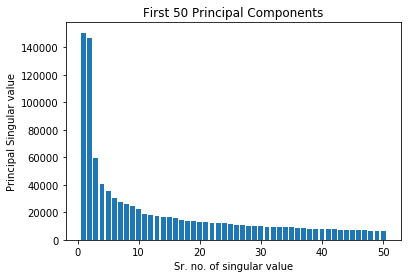

In [72]:
from dataset import A, Z    # Training Set = A, Test Set = Z

W, V, K = principalComponents(A)

plotPrincipalComponents(A, K, 50)

In [81]:
P, pred, accuracy = (new_accuracy(A,Z,W,V,K,134))

In [82]:
print(accuracy)

91.66666666666666
